This will be used mainly for the capstone project.

In [1]:
import pandas as pd
import numpy as np

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
import urllib.request

In [4]:
url1 = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [5]:
open_url = urllib.request.urlopen(url1)
from bs4 import BeautifulSoup

In [6]:
beautiful_soup = BeautifulSoup(open_url, "lxml")

In [7]:
#print(beautiful_soup.prettify())

In [8]:
neighborhoods = beautiful_soup.find("table", class_ = "wikitable")

In [9]:
#neighborhoods

In [10]:
Postal_Code = []
Borough = []
Neighborhood = []

In [11]:
for i in neighborhoods.findAll('tr'):
    data1 = i.findAll('td')
    if len(data1) == 3:
        Postal_Code.append(data1[0].find(text=True))
        Borough.append(data1[1].find(text=True))
        Neighborhood.append(data1[2].find(text=True))


In [12]:
df = pd.DataFrame(columns=['Postal_Code', 'Borough', 'Neighborhood'])

In [13]:
df['Postal_Code'] = Postal_Code
df['Borough'] = Borough
df['Neighborhood'] = Neighborhood

In [14]:
df['Postal_Code'] = df['Postal_Code'].str.strip()
df['Borough'] = df['Borough'].str.strip()
df['Neighborhood'] = df['Neighborhood'].str.strip()

In [15]:
df = df[df['Borough'] != 'Not assigned']

In [16]:
df['Neighborhood'] = df['Neighborhood'].str.replace(" /", ",")

In [17]:
df.shape

(103, 3)

In [18]:
df = df.reset_index()
df[['Postal_Code', 'Borough', 'Neighborhood']]

,Postal_Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [19]:
df_2 = pd.read_csv('http://cocl.us/Geospatial_data')

In [20]:
df_2['Postal_Code'] = df_2['Postal Code']
df_2 = df_2.drop(columns='Postal Code')

In [21]:
df_final = pd.merge(df, df_2, on='Postal_Code', how='inner')

In [22]:
df_final.reset_index()
df_final = df_final[['Postal_Code', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']]
df_final

,Postal_Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [23]:
df_final = df_final[df_final['Borough'].str.contains('toronto', case = False)].reset_index(drop=True)
df_final.sort_values(by='Borough')

,Postal_Code,Borough,Neighborhood,Latitude,Longitude
19,M5N,Central Toronto,Roselawn,43.711695,-79.416936
20,M4P,Central Toronto,Davisville North,43.712751,-79.390197
21,M5P,Central Toronto,Forest Hill North & West,43.696948,-79.411307
23,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
24,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678
26,M4S,Central Toronto,Davisville,43.704324,-79.388790
29,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
31,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049
18,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
30,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049


In [24]:
from geopy.geocoders import Nominatim

In [25]:
add = 'Toronto, CA'

geo = Nominatim(user_agent="explore_CA")
loc1 = geo.geocode(add)
latitude = loc1.latitude
longitude = loc1.longitude


In [26]:
latitude

43.6534817

In [27]:
longitude

-79.3839347

In [28]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

In [29]:
import folium

In [30]:
map_of_Toronto = folium.Map(location = [latitude, longitude])
map_of_Toronto

In [31]:
for latt, lng, borough, neighborhood, in zip(df_final['Latitude'], df_final['Longitude'], df_final['Borough'], df_final['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([latt, lng], radius = 7, popup=label, color = 'red', fill=False, parse_html=False).add_to(map_of_Toronto)
map_of_Toronto

In [32]:
df_final

,Postal_Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [33]:
#df_final[df_final['Neighborhood'].str.contains('Regent Park')]

In [34]:
import requests

In [35]:
CLIENT_ID = 'your_id'
CLIENT_SECRET = 'your_password'

In [36]:
#get the results back in json format from the Foursquare API.
VERSION = '20180605'
radius = 650
LIMIT = 2
venues = []
for latt, lng, neighborhood, in zip(df_final['Latitude'], df_final['Longitude'], df_final['Neighborhood']):
    
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, latt, lng, radius, LIMIT)
    
    result = requests.get(url).json()['response']['groups'][0]['items']
    
    venues.append([(
            neighborhood, 
            latt, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in result])
    
    #convert json file to dataframe format.
    close_venues = pd.DataFrame([i for venue_list in venues for i in venue_list])
    
    
    

    

In [37]:
#rename columns in dataframe
close_venues.columns = ['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']

In [38]:
close_venues#.shape

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Queen's Park,43.663946,-79.392180,Park
3,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Neo Coffee Bar,43.660140,-79.385870,Coffee Shop
4,"Garden District, Ryerson",43.657162,-79.378937,UNIQLO ユニクロ,43.655910,-79.380641,Clothing Store
5,"Garden District, Ryerson",43.657162,-79.378937,DAVIDsTEA,43.656973,-79.381040,Tea Room
6,St. James Town,43.651494,-79.375418,Fahrenheit Coffee,43.652384,-79.372719,Coffee Shop
7,St. James Town,43.651494,-79.375418,GEORGE Restaurant,43.653346,-79.374445,Restaurant
8,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
9,The Beaches,43.676357,-79.293031,Tori's Bakeshop,43.672114,-79.290331,Vegetarian / Vegan Restaurant


In [39]:
VERSION = '20180605'
radius = 550
#LIMIT = 50
LIMIT = 50
search_query = 'coffee'
#url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, latt, lng, radius, LIMIT)
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [40]:
result1 = requests.get(url2).json()

In [41]:
result1

{'meta': {'code': 200, 'requestId': '5ea96d94211536324b9aac50'},
 'response': {'venues': [{'id': '4b44fc77f964a520cc0026e3',
    'name': "Timothy's World Coffee",
    'location': {'address': '427 University Avenue',
     'lat': 43.65405317976302,
     'lng': -79.38808999785911,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65405317976302,
       'lng': -79.38808999785911}],
     'distance': 340,
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['427 University Avenue', 'Toronto ON', 'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1588162224',
    'hasPerk': False},
   {'id': '59f784dd28122f14f9d5d63d',
    'name': 'HotBlack Coffee',
    'lo

In [42]:
from pandas.io.json import json_normalize
dataframe1 = json_normalize(result1['response']['venues'])
dataframe1

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b44fc77f964a520cc0026e3,427 University Avenue,CA,Toronto,Canada,NaN,340,"[427 University Avenue, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.65405317976302...",43.654053,-79.388090,NaN,NaN,ON,Timothy's World Coffee,v-1588162224,NaN
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,59f784dd28122f14f9d5d63d,245 Queen Street West,CA,Toronto,Canada,at St Patrick St,515,"[245 Queen Street West (at St Patrick St), Tor...","[{'label': 'display', 'lat': 43.65036434800487...",43.650364,-79.388669,Entertainment District,M5V 1Z4,ON,HotBlack Coffee,v-1588162224,463001529
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b0aaa8ef964a520272623e3,"483 Bay St,Bell Trinity Square",CA,Toronto,Canada,Bell Trinity Square,130,"[483 Bay St,Bell Trinity Square (Bell Trinity ...","[{'label': 'display', 'lat': 43.653436, 'lng':...",43.653436,-79.382314,NaN,M5G 2C9,ON,Timothy's World Coffee,v-1588162224,NaN
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4baa9f6cf964a520817a3ae3,401 Bay St.,CA,Toronto,Canada,at Richmond St. W,268,"[401 Bay St. (at Richmond St. W), Toronto ON M...","[{'label': 'display', 'lat': 43.65213455850074...",43.652135,-79.381172,NaN,M5H 2Y4,ON,Timothy's World Coffee,v-1588162224,NaN
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4c19447c4ff90f4765ac0f49,"595 Bay St,Atrium On Bay",CA,Toronto,Canada,at Atrium on Bay,309,"[595 Bay St,Atrium On Bay (at Atrium on Bay), ...","[{'label': 'display', 'lat': 43.656219, 'lng':...",43.656219,-79.383290,NaN,M5G 2C2,ON,Timothy's World Coffee,v-1588162224,NaN
5,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,53e8acc4498ee294fb100183,425 University Ave,CA,Toronto,Canada,Dundas,296,"[425 University Ave (Dundas), Toronto ON M5G 1...","[{'label': 'display', 'lat': 43.65427, 'lng': ...",43.654270,-79.387448,NaN,M5G 1T6,ON,Timothy's World Coffee,v-1588162224,NaN
6,[],False,4baa31def964a52037523ae3,350 Bay St - 7th Floor,CA,Toronto,Canada,NaN,488,"[350 Bay St - 7th Floor, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.649498, 'lng':...",43.649498,-79.386479,NaN,NaN,ON,Coffee office,v-1588162224,NaN
7,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4ec514ec9911232436e364af,Yonge,CA,Toronto,Canada,Dundas,481,"[Yonge (Dundas), Toronto ON M5B 2G9, Canada]","[{'label': 'display', 'lat': 43.65669995833159...",43.656700,-79.379941,NaN,M5B 2G9,ON,Timothy's World Coffee,v-1588162224,NaN
8,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,4fccaa8fe4b05a98df3d9417,150 King St. W,CA,Toronto,Canada,in the PATH,624,"[150 King St. W (in the PATH), Toronto ON M5H ...","[{'label': 'display', 'lat': 43.64788137014028...",43.647881,-79.384332,NaN,M5H 4B6,ON,Sam James Coffee Bar (SJCB),v-1588162224,NaN
9,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4fb13c20e4b011e6f93513c0,122 Bond Street,CA,Toronto,Canada,at Gould St.,618,"[122 Bond Street (at Gould St.), Toronto ON M5...","[{'label': 'display', 'lat': 43.65785440672277...",43.657854,-79.379200,NaN,M5B 1X8,ON,Balzac's Coffee,v-1588162224,NaN


In [ ]:
venue_id1 = dataframe1['id'][1]

In [44]:
#url3 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id1, CLIENT_ID, CLIENT_SECRET, VERSION)
#url3

In [45]:
#result2 = requests.get(url3).json()

In [46]:
#result2['response']['venue'].keys()

In [47]:
#result2['response'].keys()

In [48]:
#try:
#    print(result2['response']['venue']['price'])
#except:
#    print("Venue hasn't doesn't have price listed.")

In [49]:
#result2['response']['venue']['likes']

In [50]:
#result2['response']['venue']['dislike']

In [51]:
#result2['response']['venue']['ok']

In [52]:
#result2['response']['venue']['tips']['count']

In [53]:
#result2['response']['venue']['attributes']

In [54]:
#try:
#    print(result2['response']['venue']['rating'])
#except:
#    print("Venue hasn't been rated.")

In [44]:
dataframe1['name']

0                       Timothy's World Coffee
1                              HotBlack Coffee
2                       Timothy's World Coffee
3                       Timothy's World Coffee
4                       Timothy's World Coffee
5                       Timothy's World Coffee
6                                Coffee office
7                       Timothy's World Coffee
8                  Sam James Coffee Bar (SJCB)
9                              Balzac's Coffee
10                      Timothy's World Coffee
11                      Treats Coffee Emporium
12                                Coffee Court
13                             Coffee Exchange
14                   Coffee Antidote 9th Floor
15                               Versus Coffee
16                       Seattle's Best Coffee
17                          M Square Coffee Co
18                  Coffee, Oysters, Champagne
19                      Timothy's World Coffee
20                           Fahrenheit Coffee
21           

In [45]:
dataframe1['location.lat']
dataframe1['location.lng']

0    -79.388090
1    -79.388669
2    -79.382314
3    -79.381172
4    -79.383290
5    -79.387448
6    -79.386479
7    -79.379941
8    -79.384332
9    -79.379200
10   -79.380776
11   -79.382310
12   -79.381650
13   -79.390983
14   -79.388666
15   -79.375236
16   -79.385902
17   -79.383555
18   -79.386730
19   -79.384181
20   -79.383767
21   -79.383864
22   -79.384393
23   -79.383439
24   -79.381827
25   -79.383831
26   -79.388749
27   -79.380936
28   -79.388953
29   -79.379047
30   -79.384300
31   -79.378765
32   -79.391256
33   -79.385613
34   -79.380782
35   -79.391137
36   -79.390902
37   -79.375755
38   -79.380699
39   -79.382684
40   -79.378704
41   -79.388047
42   -79.380933
43   -79.383149
44   -79.390990
45   -79.378339
46   -79.375815
47   -79.383500
48   -79.387452
49   -79.381863
Name: location.lng, dtype: float64

In [47]:
#get all attributes of the venues pulled previously.

In [ ]:
url4 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id1, CLIENT_ID, CLIENT_SECRET, VERSION)

In [49]:
#venue_id1 = dataframe1['id'][6]

In [ ]:
#try:
#    print(dataframe1['id'])
#except:
#    print("Venue hasn't doesn't have id listed.")

In [51]:
#test version new



#get the results back in json format from the Foursquare API.
VERSION = '20180605'
#radius = 650
#LIMIT = 7
venues = []
for id1, in zip(dataframe1['id']):
    
    url4 = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(id1, CLIENT_ID, CLIENT_SECRET, VERSION)
    
    result4 = requests.get(url4).json()
    
    #both message and rating.
    try:
        print(str(result4['response']['venue']['rating']) +  ' ' + str(result4['response']['venue']['price']['message']))
    except:
        print("Venue doesn't have rating and message listed.")
    else:   
        venues.append([
            id1,
            result4['response']['venue']['price']['message'],
            result4['response']['venue']['tips']['count'],
            result4['response']['venue']['attributes'],
            result4['response']['venue']['rating'],
            result4['response']['venue']['dislike'],
            result4['response']['venue']['ok'],
            result4['response']['venue']['likes']['count']])
            #])

    venues.append([
        id1,
        id1, #result4['response']['venue']['price']['message'],
        result4['response']['venue']['tips']['count'],
        result4['response']['venue']['attributes'],
        id1, #result4['response']['venue']['rating'],
        result4['response']['venue']['dislike'],
        result4['response']['venue']['ok'],
        result4['response']['venue']['likes']['count']])
        #])

    #convert json file to dataframe format.
    #venue_attributes = pd.DataFrame([i for venue_list in venues for i in venue_list])

6.2 Cheap
7.8 Cheap
Venue doesn't have rating and message listed.
Venue doesn't have rating and message listed.
6.3 Cheap
Venue doesn't have rating and message listed.
Venue doesn't have rating and message listed.
Venue doesn't have rating and message listed.
8.1 Cheap
7.1 Moderate
Venue doesn't have rating and message listed.
5.3 Cheap
Venue doesn't have rating and message listed.
6.1 Cheap
Venue doesn't have rating and message listed.
8.4 Cheap
Venue doesn't have rating and message listed.
8.1 Cheap
7.1 Expensive
6.3 Cheap
Venue doesn't have rating and message listed.
Venue doesn't have rating and message listed.
6.8 Cheap
Venue doesn't have rating and message listed.
Venue doesn't have rating and message listed.
Venue doesn't have rating and message listed.
Venue doesn't have rating and message listed.
8.3 Cheap
Venue doesn't have rating and message listed.
Venue doesn't have rating and message listed.
Venue doesn't have rating and message listed.
8.3 Moderate
Venue doesn't have rat

In [ ]:
test = pd.DataFrame(venues)

In [54]:
#final_test = pd.DataFrame(venues)
#final_test

In [55]:
test.columns = ['id', 'Price_Message', 'Tips_Count', 'Attributes', 'Rating', 'Dislike', 'Ok', 'Likes']
test

,id,Price_Message,Tips_Count,Attributes,Rating,Dislike,Ok,Likes
0,4b44fc77f964a520cc0026e3,Cheap,7,"{'groups': [{'type': 'price', 'name': 'Price',...",6.2,False,False,8
1,4b44fc77f964a520cc0026e3,4b44fc77f964a520cc0026e3,7,"{'groups': [{'type': 'price', 'name': 'Price',...",4b44fc77f964a520cc0026e3,False,False,8
2,59f784dd28122f14f9d5d63d,Cheap,31,"{'groups': [{'type': 'price', 'name': 'Price',...",7.8,False,False,40
3,59f784dd28122f14f9d5d63d,59f784dd28122f14f9d5d63d,31,"{'groups': [{'type': 'price', 'name': 'Price',...",59f784dd28122f14f9d5d63d,False,False,40
4,4b0aaa8ef964a520272623e3,4b0aaa8ef964a520272623e3,1,"{'groups': [{'type': 'price', 'name': 'Price',...",4b0aaa8ef964a520272623e3,False,False,2
5,4baa9f6cf964a520817a3ae3,4baa9f6cf964a520817a3ae3,3,"{'groups': [{'type': 'price', 'name': 'Price',...",4baa9f6cf964a520817a3ae3,False,False,1
6,4c19447c4ff90f4765ac0f49,Cheap,5,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,8
7,4c19447c4ff90f4765ac0f49,4c19447c4ff90f4765ac0f49,5,"{'groups': [{'type': 'price', 'name': 'Price',...",4c19447c4ff90f4765ac0f49,False,False,8
8,53e8acc4498ee294fb100183,53e8acc4498ee294fb100183,0,"{'groups': [{'type': 'price', 'name': 'Price',...",53e8acc4498ee294fb100183,False,False,0
9,4baa31def964a52037523ae3,4baa31def964a52037523ae3,0,{'groups': []},4baa31def964a52037523ae3,False,False,0


In [ ]:
#mhm if Price_message OR Rating wasn't pulled back from the API then drop that record.
test['Flag'] = 'N'
test.loc[(test['id'] != test['Price_Message']) & (test['id'] != test['Rating']), 'Flag'] = 'Y'
#test.loc[(test['id'] != test['Price_Message']), 'Flag'] = 'Y'
#test.loc[(test['id'] != test['Rating']), 'Flag'] = 'Y'

In [58]:
len(set(test['id']))

50

In [59]:
df_ids = test[test['Flag'] == 'Y']
print(len(set(df_ids['id'])))
df_final = df_ids.sort_values(by='Rating')

27


In [60]:
#new = test[~test['id'].isin(df_ids['id'].tolist())]
#len(set(new['id']))
#new

In [61]:
df_final.sort_values(by='Rating')

,id,Price_Message,Tips_Count,Attributes,Rating,Dislike,Ok,Likes,Flag
16,509d036ee4b0912bf20c8abc,Cheap,3,"{'groups': [{'type': 'price', 'name': 'Price',...",5.3,False,False,3,Y
53,59d110cc5161135b15f990b7,Cheap,4,"{'groups': [{'type': 'price', 'name': 'Price',...",6.1,False,False,10,Y
19,4b7bedfbf964a5204e742fe3,Cheap,5,"{'groups': [{'type': 'price', 'name': 'Price',...",6.1,False,False,7,Y
0,4b44fc77f964a520cc0026e3,Cheap,7,"{'groups': [{'type': 'price', 'name': 'Price',...",6.2,False,False,8,Y
63,4c8fe3216fbf224bb0074f8f,Cheap,9,"{'groups': [{'type': 'price', 'name': 'Price',...",6.2,False,False,34,Y
67,4ac6117ff964a520bfb220e3,Moderate,17,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,100,Y
29,4bf424fbe5eba593884e1f90,Cheap,5,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,7,Y
74,4dbae18d4df044e524bbb9de,Cheap,1,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,0,Y
6,4c19447c4ff90f4765ac0f49,Cheap,5,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,8,Y
71,4ad89e64f964a520ee1221e3,Moderate,18,"{'groups': [{'type': 'price', 'name': 'Price',...",6.4,False,False,60,Y


In [62]:
df_final['Rating'] = df_final.Rating.astype(str).astype(float)
df_final

,id,Price_Message,Tips_Count,Attributes,Rating,Dislike,Ok,Likes,Flag
16,509d036ee4b0912bf20c8abc,Cheap,3,"{'groups': [{'type': 'price', 'name': 'Price',...",5.3,False,False,3,Y
53,59d110cc5161135b15f990b7,Cheap,4,"{'groups': [{'type': 'price', 'name': 'Price',...",6.1,False,False,10,Y
19,4b7bedfbf964a5204e742fe3,Cheap,5,"{'groups': [{'type': 'price', 'name': 'Price',...",6.1,False,False,7,Y
0,4b44fc77f964a520cc0026e3,Cheap,7,"{'groups': [{'type': 'price', 'name': 'Price',...",6.2,False,False,8,Y
63,4c8fe3216fbf224bb0074f8f,Cheap,9,"{'groups': [{'type': 'price', 'name': 'Price',...",6.2,False,False,34,Y
67,4ac6117ff964a520bfb220e3,Moderate,17,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,100,Y
29,4bf424fbe5eba593884e1f90,Cheap,5,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,7,Y
74,4dbae18d4df044e524bbb9de,Cheap,1,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,0,Y
6,4c19447c4ff90f4765ac0f49,Cheap,5,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,8,Y
71,4ad89e64f964a520ee1221e3,Moderate,18,"{'groups': [{'type': 'price', 'name': 'Price',...",6.4,False,False,60,Y


In [63]:
df_final = pd.merge(df_final, dataframe1, on='id', how='inner')
df_final

,id,Price_Message,Tips_Count,Attributes,Rating,Dislike,Ok,Likes,Flag,categories,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,509d036ee4b0912bf20c8abc,Cheap,3,"{'groups': [{'type': 'price', 'name': 'Price',...",5.3,False,False,3,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[Bell Trinity Square, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.65311707897502...",43.653117,-79.382310,NaN,NaN,ON,Treats Coffee Emporium,v-1588162224,NaN
1,59d110cc5161135b15f990b7,Cheap,4,"{'groups': [{'type': 'price', 'name': 'Price',...",6.1,False,False,10,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[68 Shuter Street (at Dalhousie St), Toronto O...","[{'label': 'display', 'lat': 43.655033, 'lng':...",43.655033,-79.375755,Downtown Toronto,M5B 1B1,ON,Mast Coffee,v-1588162224,NaN
2,4b7bedfbf964a5204e742fe3,Cheap,5,"{'groups': [{'type': 'price', 'name': 'Price',...",6.1,False,False,7,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[109 McCaul St (Dundas St W (The Grange)), Tor...","[{'label': 'display', 'lat': 43.65373019161559...",43.653730,-79.390983,NaN,M5T 3K5,ON,Coffee Exchange,v-1588162224,NaN
3,4b44fc77f964a520cc0026e3,Cheap,7,"{'groups': [{'type': 'price', 'name': 'Price',...",6.2,False,False,8,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[427 University Avenue, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.65405317976302...",43.654053,-79.388090,NaN,NaN,ON,Timothy's World Coffee,v-1588162224,NaN
4,4c8fe3216fbf224bb0074f8f,Cheap,9,"{'groups': [{'type': 'price', 'name': 'Price',...",6.2,False,False,34,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[218 Yonge St, 1-158, Toronto Eaton Centre (Le...","[{'label': 'display', 'lat': 43.655536, 'lng':...",43.655536,-79.380933,Downtown Yonge,M5B 2H6,ON,Starbucks,v-1588162224,NaN
5,4ac6117ff964a520bfb220e3,Moderate,17,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,100,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[250 Queen St W (at John St), Toronto ON M5V 1...","[{'label': 'display', 'lat': 43.65001, 'lng': ...",43.650010,-79.390990,NaN,M5V 1Z7,ON,Starbucks,v-1588162224,NaN
6,4bf424fbe5eba593884e1f90,Cheap,5,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,7,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[150 York Street (Adelaide), Toronto ON, Canada]","[{'label': 'display', 'lat': 43.64924264641939...",43.649243,-79.384181,NaN,NaN,ON,Timothy's World Coffee,v-1588162224,NaN
7,4dbae18d4df044e524bbb9de,Cheap,1,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,0,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,[200 Elizabeth St (Toronto General Hospital - ...,"[{'label': 'display', 'lat': 43.6584756, 'lng'...",43.658476,-79.387452,NaN,M5G 2C4,ON,Tim Hortons,v-1588162224,NaN
8,4c19447c4ff90f4765ac0f49,Cheap,5,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,8,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[595 Bay St,Atrium On Bay (at Atrium on Bay), ...","[{'label': 'display', 'lat': 43.656219, 'lng':...",43.656219,-79.383290,NaN,M5G 2C2,ON,Timothy's World Coffee,v-1588162224,NaN
9,4ad89e64f964a520ee1221e3,Moderate,18,"{'groups': [{'type': 'price', 'name': 'Price',...",6.4,False,False,60,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[167 Church St (at Shuter), Toronto ON M5B 2N2...","[{'label': 'display', 'lat': 43.65484101599912...",43.654841,-79.375815,NaN,M5B 2N2,ON,Starbucks,v-1588162224,NaN


In [64]:
#predict Rating based on Tips_Count and Likes.
#We would like to attain a rating of 8.7 or higher (1 point above the most Expensive Coffee Shop.)
#Tips_Count and Likes are almost perfectly correlated .94 with very small p-value.
from scipy import stats
stats.pearsonr(df_final['Tips_Count'], df_final['Likes'])



(0.9451311271152868, 1.1875996676520857e-13)

In [65]:
#slighlty better correlation between Rating and Tips_Count
df_final[["Tips_Count", "Likes", "Rating"]].corr()

,Tips_Count,Likes,Rating
Tips_Count,1.000000,0.945131,0.439460
Likes,0.945131,1.000000,0.419733
Rating,0.439460,0.419733,1.000000


In [66]:
df_final.dtypes

id                            object
Price_Message                 object
Tips_Count                     int64
Attributes                    object
Rating                       float64
Dislike                         bool
Ok                              bool
Likes                          int64
Flag                          object
categories                    object
hasPerk                         bool
location.address              object
location.cc                   object
location.city                 object
location.country              object
location.crossStreet          object
location.distance              int64
location.formattedAddress     object
location.labeledLatLngs       object
location.lat                 float64
location.lng                 float64
location.neighborhood         object
location.postalCode           object
location.state                object
name                          object
referralId                    object
venuePage.id                  object
d

In [67]:
df_final[["Tips_Count", "Likes", "Rating"]].describe()

,Tips_Count,Likes,Rating
count,27.000000,27.000000,27.000000
mean,20.444444,65.481481,7.029630
std,29.111633,94.191854,0.878292
min,1.000000,0.000000,5.300000
25%,5.000000,9.000000,6.300000
50%,13.000000,34.000000,6.900000
75%,21.000000,86.000000,7.950000
max,152.000000,449.000000,8.400000


In [68]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [69]:
linear_reg.fit(df_final[['Tips_Count']], df_final[['Rating']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
linear_reg.predict(df_final[['Tips_Count']])

array([[6.79834419],
       [6.81160259],
       [6.82486099],
       [6.8513778 ],
       [6.8778946 ],
       [6.9839618 ],
       [6.82486099],
       [6.77182739],
       [6.82486099],
       [6.99722021],
       [6.9044114 ],
       [6.9309282 ],
       [6.99722021],
       [6.9441866 ],
       [7.12980421],
       [6.79834419],
       [7.32868023],
       [6.99722021],
       [7.31542183],
       [7.16957942],
       [6.9309282 ],
       [7.07677061],
       [6.83811939],
       [6.81160259],
       [8.77384593],
       [7.32868023],
       [6.957445  ]])

In [71]:
linear_reg.intercept_

array([6.75856899])

In [72]:
linear_reg.coef_

array([[0.0132584]])

[Text(0.5, 1.0, 'SLR')]

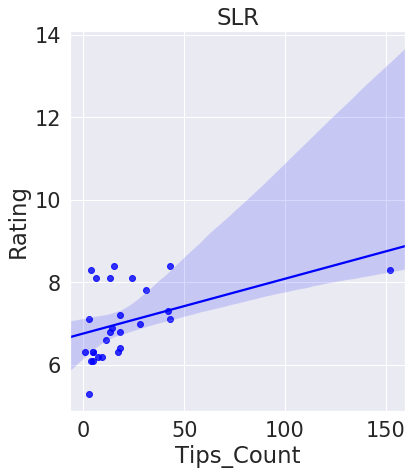

In [73]:
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

w = 6
h = 7

plt.figure(figsize=(w,h))
sea.set_style('whitegrid')
sea.set(font_scale=1.9)

plot = sea.regplot(x='Tips_Count', y='Rating', marker='o', color='blue', data=df_final)
plot.set(xlabel='Tips_Count', ylabel='Rating')
plot.set(title='SLR')







In [74]:
df_final

,id,Price_Message,Tips_Count,Attributes,Rating,Dislike,Ok,Likes,Flag,categories,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,509d036ee4b0912bf20c8abc,Cheap,3,"{'groups': [{'type': 'price', 'name': 'Price',...",5.3,False,False,3,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[Bell Trinity Square, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.65311707897502...",43.653117,-79.382310,NaN,NaN,ON,Treats Coffee Emporium,v-1588162224,NaN
1,59d110cc5161135b15f990b7,Cheap,4,"{'groups': [{'type': 'price', 'name': 'Price',...",6.1,False,False,10,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[68 Shuter Street (at Dalhousie St), Toronto O...","[{'label': 'display', 'lat': 43.655033, 'lng':...",43.655033,-79.375755,Downtown Toronto,M5B 1B1,ON,Mast Coffee,v-1588162224,NaN
2,4b7bedfbf964a5204e742fe3,Cheap,5,"{'groups': [{'type': 'price', 'name': 'Price',...",6.1,False,False,7,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[109 McCaul St (Dundas St W (The Grange)), Tor...","[{'label': 'display', 'lat': 43.65373019161559...",43.653730,-79.390983,NaN,M5T 3K5,ON,Coffee Exchange,v-1588162224,NaN
3,4b44fc77f964a520cc0026e3,Cheap,7,"{'groups': [{'type': 'price', 'name': 'Price',...",6.2,False,False,8,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[427 University Avenue, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.65405317976302...",43.654053,-79.388090,NaN,NaN,ON,Timothy's World Coffee,v-1588162224,NaN
4,4c8fe3216fbf224bb0074f8f,Cheap,9,"{'groups': [{'type': 'price', 'name': 'Price',...",6.2,False,False,34,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[218 Yonge St, 1-158, Toronto Eaton Centre (Le...","[{'label': 'display', 'lat': 43.655536, 'lng':...",43.655536,-79.380933,Downtown Yonge,M5B 2H6,ON,Starbucks,v-1588162224,NaN
5,4ac6117ff964a520bfb220e3,Moderate,17,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,100,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[250 Queen St W (at John St), Toronto ON M5V 1...","[{'label': 'display', 'lat': 43.65001, 'lng': ...",43.650010,-79.390990,NaN,M5V 1Z7,ON,Starbucks,v-1588162224,NaN
6,4bf424fbe5eba593884e1f90,Cheap,5,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,7,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[150 York Street (Adelaide), Toronto ON, Canada]","[{'label': 'display', 'lat': 43.64924264641939...",43.649243,-79.384181,NaN,NaN,ON,Timothy's World Coffee,v-1588162224,NaN
7,4dbae18d4df044e524bbb9de,Cheap,1,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,0,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,[200 Elizabeth St (Toronto General Hospital - ...,"[{'label': 'display', 'lat': 43.6584756, 'lng'...",43.658476,-79.387452,NaN,M5G 2C4,ON,Tim Hortons,v-1588162224,NaN
8,4c19447c4ff90f4765ac0f49,Cheap,5,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,8,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[595 Bay St,Atrium On Bay (at Atrium on Bay), ...","[{'label': 'display', 'lat': 43.656219, 'lng':...",43.656219,-79.383290,NaN,M5G 2C2,ON,Timothy's World Coffee,v-1588162224,NaN
9,4ad89e64f964a520ee1221e3,Moderate,18,"{'groups': [{'type': 'price', 'name': 'Price',...",6.4,False,False,60,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[167 Church St (at Shuter), Toronto ON M5B 2N2...","[{'label': 'display', 'lat': 43.65484101599912...",43.654841,-79.375815,NaN,M5B 2N2,ON,Starbucks,v-1588162224,NaN


In [75]:
#only one coffee shop that's classified as "Expensive"
df_final.groupby('Price_Message').count()

,id,Tips_Count,Attributes,Rating,Dislike,Ok,Likes,Flag,categories,hasPerk,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
Price_Message,,,,,,,,,,,,,,,,,,,,,
Cheap,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,5,12,18,18,18,1
Expensive,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,0
Moderate,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,1,8,8,8,8,0


In [76]:
#store id of the coffee shop that's classfied as "Expensive"
Expensive = str(df_final[df_final['Price_Message'] == 'Expensive']['id'].tolist()).strip("['']")

In [77]:
#Analyze the second most Expensive class which is Moderate
Moderate_df = df_final[df_final['Price_Message'] == 'Moderate']
Moderate_df.groupby('Rating').count()['id']
Moderate_df['Rating'].min()

6.3

In [78]:
Moderate_row = Moderate_df[Moderate_df['Rating'] == Moderate_df['Rating'].min()]
Moderate = str(Moderate_row['id'].tolist()).strip("['']")

In [96]:
df_final[df_final['id']==Moderate]

,id,Price_Message,Tips_Count,Attributes,Rating,Dislike,Ok,Likes,Flag,categories,...,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id,Group
5,4ac6117ff964a520bfb220e3,Moderate,17,"{'groups': [{'type': 'price', 'name': 'Price',...",6.3,False,False,100,Y,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",...,"[{'label': 'display', 'lat': 43.65001, 'lng': ...",43.65001,-79.39099,NaN,M5V 1Z7,ON,Starbucks,v-1588162224,NaN,1


In [85]:
df_final['Group'] = 0
#df_final.loc[(df_final['id']==Expensive) | (df_final['id']==Moderate), 'Group'] = 1
df_final.loc[(df_final['id']==Moderate), 'Group'] = 1

In [86]:
final_array = ['#8000ff', '#ff0000']

In [87]:
clusters_m = folium.Map(location=[latitude, longitude])

In [88]:
#show map with five different clusters based on the KMeans clustering group determined above.
circle_colors = []
for latt, long, neighborhood, cluster in zip(df_final['location.lat'], df_final['location.lng'], df_final['name'], df_final['Group']):
    tag = folium.Popup(str(neighborhood) + ' Group ' + str(cluster), parse_html = True)
    folium.CircleMarker([latt, long], radius = 7, popup=tag, color = final_array[cluster-1], fill=True, fill_color = final_array[cluster-1], fill_opacity=.9).add_to(clusters_m)

In [89]:
clusters_m

In [90]:
#The prediction equation for SLR is:
#.0132584(x) + 6.75856899
#The max Rating in our dataset is 8.4 if we would like to attain a rating of one above the highest how many Tips_Count will we need to attain such a rating?
#9.4 = .0132584(x) + 6.75856899
#We can solve algebraically and find that we'll need 199.2269814 Tips_Count to get get to a 9.4 according to our SLR model.